# Задача

Проанализировать данные из набора **nba_games.csv**

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# укажем точность значений отображаемый библиотекой numpy
np.set_printoptions(suppress=True, precision=2)

# загружаем данные в переменную
nba = pd.read_csv('nba_games.csv')

# отобразим первые несколько строк набора данных
print(nba.head())

        game_id  year_id  fran_id      opp_fran game_location  is_playoffs  \
0  194611010TRH     1947   Knicks       Huskies             A            0   
1  194611020CHS     1947   Knicks         Stags             A            0   
2  194611020PRO     1947  Celtics  Steamrollers             A            0   
3  194611050BOS     1947  Celtics         Stags             H            0   
4  194611070STB     1947   Knicks       Bombers             A            0   

   pts  opp_pts game_result  forecast  point_diff  
0   68       66           W  0.359935           2  
1   47       63           L  0.368899         -16  
2   53       59           L  0.359935          -6  
3   55       57           L  0.620204          -2  
4   68       63           W  0.339290           5  


## Описание набора данных
- game_id - уникальный идентификатор игры
- year_id - идентификатор сезона, названный годом в котором сезон закончился
- fran_id - идентификатор франшизы. Под одной франшизой могут выступать несколько команд
- opp_fran - идентификатор франшизы опонента
- game_location - H (Home), A (Away), N (Neutral)
- is_playoffs - метка наличия playoff-а
- pts - Points Scored by team Очки заработанные командой
- opp_pts - Очки заработанные командой оппонента
- game_result - W (Win) L (Loss)
- forecast - Шансы на победу
- point_diff - разница между переменными pts и opp_pts

## Разделить набор данных
Разделите набор данных на два набора
- В одном будет храниться информация за 2010 год
- Во втором за 2014

In [2]:
# воспользуемся методами Pandas
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

print('NBA 2010', nba_2010.head(), sep='\n')
print('NBA 2014', nba_2014.head(), sep='\n')

NBA 2010
            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  
NBA 2014
            game_id  year_id  fran_id   opp_fran game_location  is_playoffs  \
23468  201310300CLE     2014     Nets  Cavaliers             A            

## Разбить набор данных 2010 года на два series по pts
- В первом наборе будут данные fran_id **Knicks**
- Второй набор fran_id **Nets**

In [3]:
knicks_pts_10 = nba_2010[nba_2010.fran_id == 'Knicks'].pts
nets_pts_10 = nba_2010[nba_2010.fran_id == 'Nets'].pts

print(knicks_pts_10)
print(nets_pts_10)

21719     93
21725    100
21728    127
21734    117
21739     89
        ... 
22102    105
22110    103
22116     98
22118    114
22126    113
Name: pts, Length: 82, dtype: int64
21720     93
21727     85
21730    104
21733     68
21738     94
        ... 
22103     89
22108    127
22113    102
22117     95
22124     86
Name: pts, Length: 82, dtype: int64


## Расчитайте разницу между средними
- Рассчитайте разницу между средними значениями pts между двумя франшизами
- Ответьте на вопрос: как думаете связаны ли две переменные pts и fran_id и почему да или нет

In [4]:
diff_mean_2010 = knicks_pts_10.mean() - nets_pts_10.mean()
print(diff_mean_2010)

9.731707317073173


### Анализ результата
- По полученному значению очень сложно сказать есть ли связь между двумя перменными
- Судя по значению можно скажать что среднее значение pts франшизы Knicks выше на 9,73 пункта чем pts франшизы Nets
- Однозначно описать связь не удается

## Построить гистограмму перекрытия
- Построить гистограмму перекрытия для двух переменных

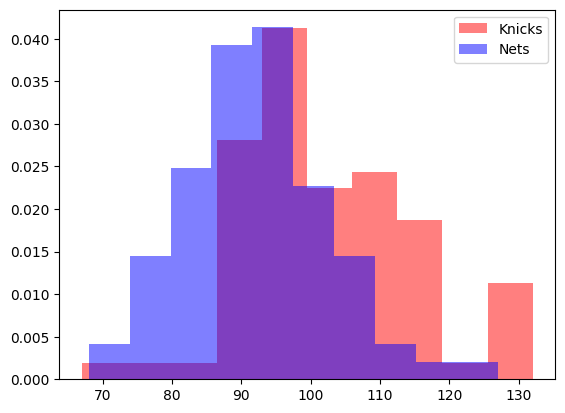

In [5]:
plt.hist(knicks_pts_10, color='red', label = 'Knicks', density=True, alpha = 0.5)
plt.hist(nets_pts_10, color='blue', label = 'Nets', density=True, alpha = 0.5)

plt.legend()
plt.show()
plt.close()

### Анализ графика
- Судя по полученному графику и способу его анализа
    - Оба распределения можно считать нормальными без смещения
    - В виду наличия большого кол-ва перекрытий значений можно сказать что переменные fran_id и pts не взаимосвязаны между собой
    

## Сравните игры между 2010 и 2014 годами
Повторить ранее сделанные шаги для 2010 года для набора данных 2014 года

0.44706798131809933


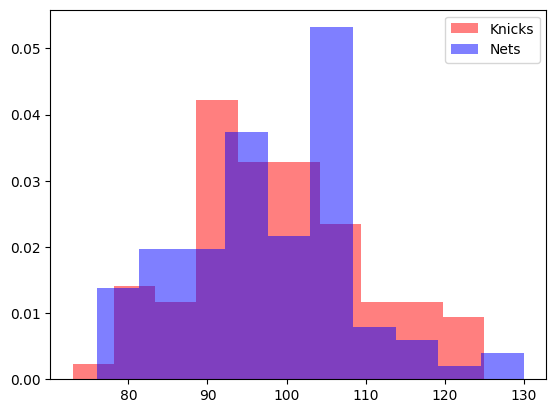

In [6]:
# Разбиваем набор данных на два
knicks_pts_14 = nba_2014[nba_2014.fran_id == 'Knicks'].pts
nets_pts_14 = nba_2014[nba_2014.fran_id == 'Nets'].pts

# Рассчитываем разницу средних значений
diff_mean_2014 = knicks_pts_14.mean() - nets_pts_14.mean()
print(diff_mean_2014)

plt.hist(knicks_pts_14, color='red', label='Knicks', density=True, alpha = 0.5)
plt.hist(nets_pts_14, color='blue', label='Nets', density=True, alpha = 0.5)

plt.legend()
plt.show()
plt.close()

### Анализ результатов 2014 года
Судя по полученным данным а в частности разности между средним значением **pts** между *2010* и *2014* годами, можно сказать что среднее значение стало практически одинаковым

Но при создании перекрывающейся гистограммы можно заметить что у *Nets* больше значений расположенных в диапазоне от *105-110*, когда у *Knicks* между *90-95* но больше значений в диапазоне от *120 до 125*

Таким образом можно также сказать что зависимости от **fran_id** и **pts** нет

## Обнаружения зависимости между fran_id и pts 2010 года в разрезе fran_id
Построить side-by-side коробочную диаграмму где по оси X будут расположены наименования fran_id а по Y их значения pts

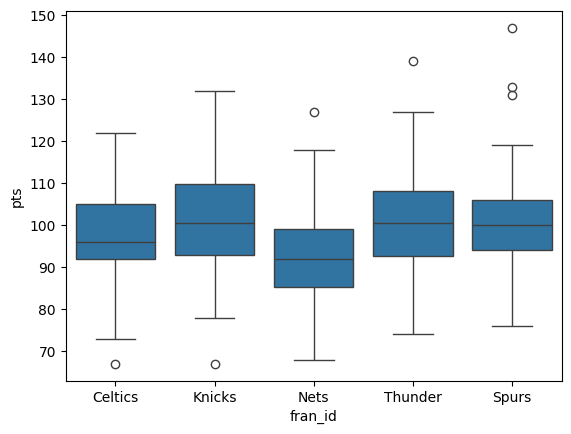

In [7]:
sns.boxplot(data=nba_2010, x="fran_id", y='pts')
plt.show()
plt.close()

### Ананлиз side-by-side boxplot
Также как и с гистограммой при обнаружении зависимости между значениями используется перекрытие т.е.
- чем больше перекрытий тем меньше взаимосвязи между переменными
- чем меньше перекрытий тем больше зависимости между переменными

По полученному графику видно большое кол-во перекрытий между графиками что свидетельствует об отсутсвии зависимости значения pts от fran_id

## Анализ игр

Ответить на вопрос - есть ли закономерность выигрышей от места проведения игры
- game_result
- game_location

Сохранить результат в переменную **location_result_freq**

In [9]:
# воспользуемся кросс таблицей pandas
location_result_freq = pd.crosstab(nba.game_result, nba.game_location)
print(location_result_freq)
# Также сразу выведем пропорции значений
location_result_prop = location_result_freq / len(nba)
print(location_result_prop)

game_location     A     H  N
game_result                 
L              7105  4298  3
W              5003  7942  8
game_location         A         H         N
game_result                                
L              0.291679  0.176444  0.000123
W              0.205386  0.326040  0.000328


### Анализ полученного результата
Судя по полученным данным можно сказать
- При игре не дома "Проигрышей" больше чем "Побед" в 1.5 раза
- При игре дома "Побед" почти в 2 раза больше чем "Поражений"
- Игры на нейтральной территории не так много относительно кол-ва игр вне дома и дома, поэтому сложно вывести статистику по данной категории

## Продолжение анализа категорийный переменных
Давайте рассчитаем показатель chi2, и ожидаемые результаты

In [13]:
# для расчета воспользуемся методом chi2_contingency
chi2, pvalue, dof, expected = chi2_contingency(location_result_freq)
print('chi2', chi2, sep = '\n')
print('expected', expected, sep = '\n')
print('actual', location_result_freq, sep = '\n')

chi2
1359.2878749575696
expected
[[5669.52 5731.33    5.15]
 [6438.48 6508.67    5.85]]
actual
game_location     A     H  N
game_result                 
L              7105  4298  3
W              5003  7942  8


### Анализ результатов
Судя по полученным результатам можно сказать что
- существует сильная зависимости двух переменных так как значение chi2 превышает значение размера таблицы (2х3=6)
- также не вооруженным взглядом видна большая разница в значениях таблиц ожидаемых (expected) и исследуемых (actual)

## Выявление зависимости между двумя кол-ми переменными
Определите есть ли зависимости между переменными forecast и point_diff другими словами
- соответствует ли вероятность победы команды разнице в очках
- чем выше шанс на победу тем больше разница в очках
- чем ниже шансы на победу тем меньше разница в очках

In [18]:
# Для расчета будет взят набор данных за 2010 год
# Рассчитаем ковариацию между двумя переменными, для ее расчета используется метод cov библиотеки np
point_diff_forecast_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_cov)
# Показатель ковариации равен 1.37
# Рассчитаем корреляцию между двумя переменными, для его расчета используется метод personr библиотеки scipy.stat
point_diff_forecast_cor, pvalue = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_cor)
# Корреляция равна 0.44

[[  0.05   1.37]
 [  1.37 186.56]]
0.4402088708468082


### Анализ полученных значений
Судя по полученными данным между переменными есть линейная взаимосвязь об этом говорят
- Значение корреляции 0.44 *значение корреляции выше 0.3 говорит о наличии линейной зависимости*
    - Сила корреляции не высока
    - Направление положительное
- Значение ковариации отличного от 0 говорит о наличии зависимости в целом

## Создать графическое представление
Сотавить графические представления зависимости между двумя переменными использую точечный график

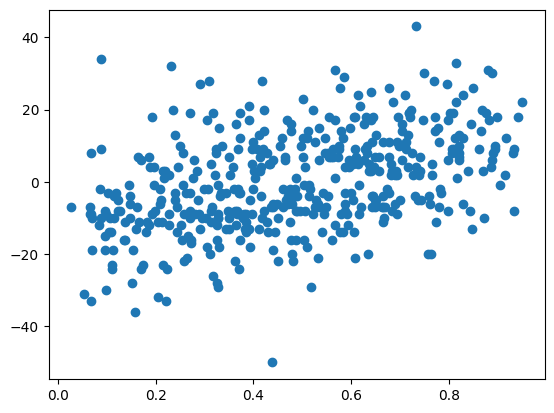

In [21]:
# Для отображения зависимости между числовыми переменными
# Используется точечный график scatterplot, который строить посредствам вызова метод scatter библиотеки plt
plt.scatter(x = nba_2010.forecast, y = nba_2010.point_diff)
plt.show()
plt.close()